# Modeling with support vector machines

In [3]:
import pandas as pd
from sklearn import svm
import numpy as np

In [4]:
sourceData = pd.read_csv('../data/train.csv', index_col = 'PassengerId')
sourceData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Prepare the data

In [5]:
def prepareTrainData(data, is_test = False):
    # Creates a copy of the dataset
    dataset = data.copy()
    
    # Renames the columns to be lowecase
    dataset.columns = [
        'survived',
        'class',
        'name',
        'sex',
        'age',
        'siblings',
        'parch',
        'ticket',
        'fare',
        'cabin',
        'embarked'
    ]
    
    # Drops data that won't be used or we consider it's barely relevant
    dataset.drop(columns = ['name', 'cabin', 'ticket'], inplace = True)
    
    # Fills ages with the mean
    mean_age = dataset.age.mean()
    dataset.age.fillna(mean_age, inplace = True)
    
    # Fills embarked nan with the mean value
    # and uses numbers to represent the port
    dataset.replace({ 'embarked': { 'S': 1, 'C': 2, 'Q': 3 }}, inplace = True)
    mean_port = dataset.embarked.mean()
    dataset.embarked.fillna(mean_port, inplace = True)
    
    # Replaces male and female values with numbers
    dataset.replace({ 'sex': { 'male': 1, 'female': 2 }}, inplace = True)
    
    return dataset

In [6]:
dataset = prepareTrainData(sourceData)
mean_age = dataset.age.mean()
mean_port = dataset.embarked.mean()
mean_fare = dataset.fare.mean()
dataset.head()

,survived,class,sex,age,siblings,parch,fare,embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1.0
2,1,1,2,38.0,1,0,71.2833,2.0
3,1,3,2,26.0,0,0,7.9250,1.0
4,1,1,2,35.0,1,0,53.1000,1.0
5,0,3,1,35.0,0,0,8.0500,1.0


## Training the model

In [167]:
trainingData = dataset.drop(columns = ['survived'])
trainingData.head()

,class,sex,age,siblings,parch,fare,embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,1.0
2,1,2,38.0,1,0,71.2833,2.0
3,3,2,26.0,0,0,7.9250,1.0
4,1,2,35.0,1,0,53.1000,1.0
5,3,1,35.0,0,0,8.0500,1.0


In [7]:
X = dataset.drop(columns = ['survived']).values
y = dataset.survived.values

In [199]:
clf = svm.SVC(gamma='scale', C = 0.9)

clf.fit(X, y)

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predicting with the test set

### Loading and cleaning the data

In [200]:
testData = pd.read_csv('../data/test.csv', index_col = 'PassengerId')
testData.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
def prepareData(data, is_test = False):
    # Creates a copy of the dataset
    dataset = data.copy()
    
    # Renames the columns to be lowecase
    dataset.columns = [
        'class',
        'name',
        'sex',
        'age',
        'siblings',
        'parch',
        'ticket',
        'fare',
        'cabin',
        'embarked'
    ]
    
    # Drops data that won't be used or we consider it's barely relevant
    dataset.drop(columns = ['name', 'cabin', 'ticket'], inplace = True)
    
    # and uses numbers to represent the port
    dataset.replace({ 'embarked': { 'S': 1, 'C': 2, 'Q': 3 }}, inplace = True)
    
    # Fills nans
    dataset.age.fillna(mean_age, inplace = True)
    dataset.embarked.fillna(mean_port, inplace = True)
    dataset.fare.fillna(mean_fare, inplace = True)
    
    
    # Replaces male and female values with numbers
    dataset.replace({ 'sex': { 'male': 1, 'female': 2 }}, inplace = True)
    
    return dataset

In [202]:
preparedTestData = prepareData(testData)
preparedTestData.head()

,class,sex,age,siblings,parch,fare,embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,2,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,2,22.0,1,1,12.2875,1


In [203]:
predictions = []
for index, row in preparedTestData.iterrows(): 
    row_vector = row.values
    predictions.append(clf.predict([row_vector])[0])

In [204]:
testDataWithPredictions = preparedTestData.assign(survived = predictions)

In [205]:
testDataWithPredictions.head()

,class,sex,age,siblings,parch,fare,embarked,survived
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,3,0
893,3,2,47.0,1,0,7.0000,1,0
894,2,1,62.0,0,0,9.6875,3,0
895,3,1,27.0,0,0,8.6625,1,0
896,3,2,22.0,1,1,12.2875,1,0


## Checking the results graphically

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

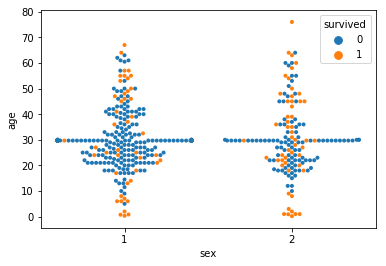

In [207]:
_ = sns.swarmplot(
    x ='sex',
    y = 'age',
    hue = 'survived',
    data = testDataWithPredictions,
    s = 4
)

_ = plt.title('')
_ = plt.xlabel('sex')
_ = plt.ylabel('age')


plt.show()

## Writing results to CSV

In [189]:
testDataWithPredictions\
    .drop(columns = ['class', 'sex', 'age', 'siblings', 'parch', 'fare', 'embarked'])\
    .to_csv('../results/notebook-first-svm.csv')